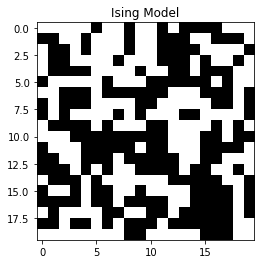

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from ipywidgets import interact, widgets

def initialize_lattice(size):
    return 2 * np.random.randint(2, size=(size, size)) - 1  # Initialize spins randomly as +1 or -1

def metropolis(lattice, temperature):
    size = len(lattice)
    row, col = np.random.randint(0, size), np.random.randint(0, size)
    spin = lattice[row, col]
    
    # Calculate energy change if this spin is flipped
    dE = 2 * spin * (lattice[(row - 1) % size, col] +
                     lattice[(row + 1) % size, col] +
                     lattice[row, (col - 1) % size] +
                     lattice[row, (col + 1) % size])
    
    # Metropolis acceptance criterion
    if dE < 0 or np.random.rand() < np.exp(-dE / temperature):
        spin *= -1
        lattice[row, col] = spin

def ising_model(size, temperature, steps):
    lattice = initialize_lattice(size)
    
    for _ in range(steps):
        metropolis(lattice, temperature)
    
    return lattice

def update(size, temperature, steps):
    global lattice
    lattice = ising_model(size, temperature, steps)
    ax.clear()
    ax.imshow(lattice, cmap='binary', vmin=-1, vmax=1, origin='upper')
    ax.set_title('Ising Model')

# Initial parameters
size = 20
temperature = 2.0
steps = 100
lattice = initialize_lattice(size)

# Create sliders
size_slider = widgets.IntSlider(min=5, max=50, step=5, value=size, description='Size:')
temp_slider = widgets.FloatSlider(min=0.1, max=5.0, step=0.1, value=temperature, description='Temperature:')
steps_slider = widgets.IntSlider(min=10, max=500, step=10, value=steps, description='Steps:')

# Display widgets
widgets.VBox([size_slider, temp_slider, steps_slider])

# Initialize and show the initial plot
fig, ax = plt.subplots()
update(size, temperature, steps)
plt.show()


In [6]:
%matplotlib notebook

<IPython.core.display.Javascript object>


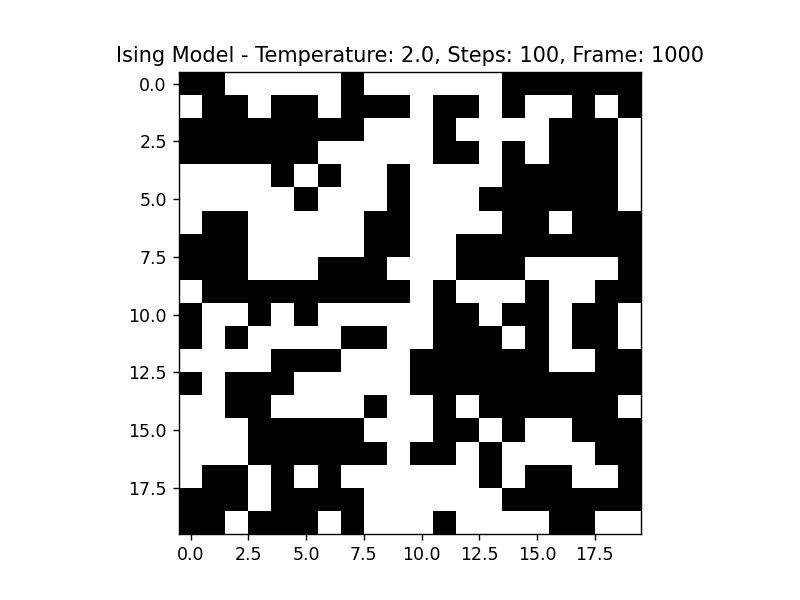

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Function to initialize a random spin configuration
def initialize_spins(shape):
    return 2 * np.random.randint(2, size=shape) - 1

# Function to perform a single Monte Carlo update
def monte_carlo_update(spins, temperature):
    i, j = np.random.randint(spins.shape[0]), np.random.randint(spins.shape[1])
    delta_energy = 2 * spins[i, j] * (spins[(i + 1) % spins.shape[0], j] + spins[i - 1, j] +
                                      spins[i, (j + 1) % spins.shape[1]] + spins[i, j - 1])
    
    if delta_energy < 0 or np.random.rand() < np.exp(-delta_energy / temperature):
        spins[i, j] *= -1

# Function to update the plot in each animation frame
def update(frame):
    for _ in range(steps_per_frame):
        monte_carlo_update(spins, temperature)
    img.set_array(spins)
    return img,

# Set the size of the lattice
lattice_size = 50

# Initialize random spin configuration
spins = initialize_spins((lattice_size, lattice_size))

# Set simulation parameters
temperature = 2.0
steps_per_frame = 10

# Create the initial plot
fig, ax = plt.subplots()
img = ax.imshow(spins, cmap='binary', interpolation='none')
plt.title(f'2D Ising Model - T={temperature}')

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=1000, interval=50, blit=True)

# Show the animation
plt.show()


<IPython.core.display.Javascript object>


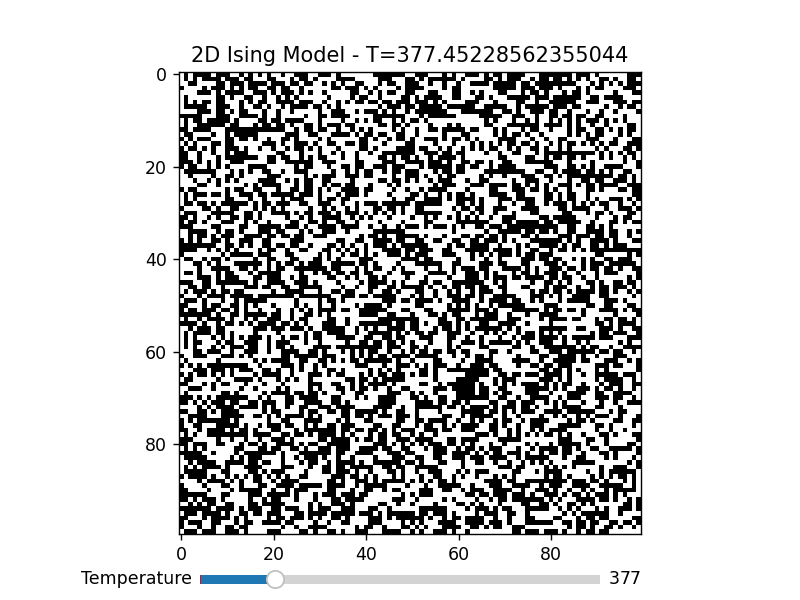

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider

# Function to initialize a random spin configuration
def initialize_spins(shape):
    return 2 * np.random.randint(2, size=shape) - 1

# Function to perform a single Monte Carlo update
def monte_carlo_update(spins, temperature):
    i, j = np.random.randint(spins.shape[0]), np.random.randint(spins.shape[1])
    delta_energy = 2 * spins[i, j] * (spins[(i + 1) % spins.shape[0], j] + spins[i - 1, j] +
                                      spins[i, (j + 1) % spins.shape[1]] + spins[i, j - 1])
    
    if delta_energy < 0 or np.random.rand() < np.exp(-delta_energy / temperature):
        spins[i, j] *= -1

# Function to update the plot in each animation frame
def update(frame):
    for _ in range(steps_per_frame):
        monte_carlo_update(spins, temperature)
    img.set_array(spins)
    return img,

# Function to update the temperature on slider change
def update_temperature(val):
    global temperature
    temperature = temperature_slider.val
    ax.set_title(f'2D Ising Model - T={temperature}')
    ani.event_source.stop()
    ani.event_source.start()

# Set the size of the lattice
lattice_size = 100

# Initialize random spin configuration
spins = initialize_spins((lattice_size, lattice_size))

# Set simulation parameters
temperature = 2.0
steps_per_frame = 10

# Create the initial plot
fig, ax = plt.subplots()
img = ax.imshow(spins, cmap='binary', interpolation='none')
plt.title(f'2D Ising Model - T={temperature}')

# Create a slider for temperature
temperature_slider_ax = plt.axes([0.25, 0.02, 0.5, 0.03], facecolor='lightgoldenrodyellow')
temperature_slider = Slider(temperature_slider_ax, 'Temperature', 1, 2000, valinit=temperature)
temperature_slider.on_changed(update_temperature)

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=1000, interval=50, blit=True)

# Show the plot
plt.show()
